# ARYA.AI ASSIGNMENT

The given dataset has 57 features with no description provided .
All the features are numerical and since features are ambiguos , we cannot really draw BUSSINESS insights from it. 

Nonetheless I will try to check how data behaves and try to determine most important features for  the model.
So in accordance with this ,I will use 3 approaches in this notebook  :

1. Logistic Regression and Random Forest
2. Reduce features with Backward Elimination and train both the model
3. Train with Full Dataset

## INDEX

1. Preliminary Look at the data and Cleaning the data
        1.A Missing Values
        1.B Histograms
        1.C Correlation
        1.D Duplicates check
        1.E Class Imbalance
        1.F Normalization
2. Model
        2.A Logistic Regression
            2.A.1 With Full Data
            2.A.2 Adjusted Threshold
            2.A.3 Backward Elimination
            2.A.4 Feature Importance
        2.B Random Forest
            2.B.1 With Full Data
            2.B.2 Backward Elimination
            2.B.3 Feature Importance
3. Test Data

4. Conclusions

# 1. Preliminary Look at the data and Cleaning the data

In [142]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [189]:
data = pd.read_csv("training_set.csv")

In [144]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [145]:
data.shape

(3910, 59)

In [146]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [147]:
data.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


Here , many features has maximum values as 0 , evident by the fact that 75 percentile data is still 0 for many features.
We can drop these features , but for now I would like to keep it and see what we can do ahead.

### 1.A Missing Values

In [148]:
data.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

No missing values!

### 1.B Histograms

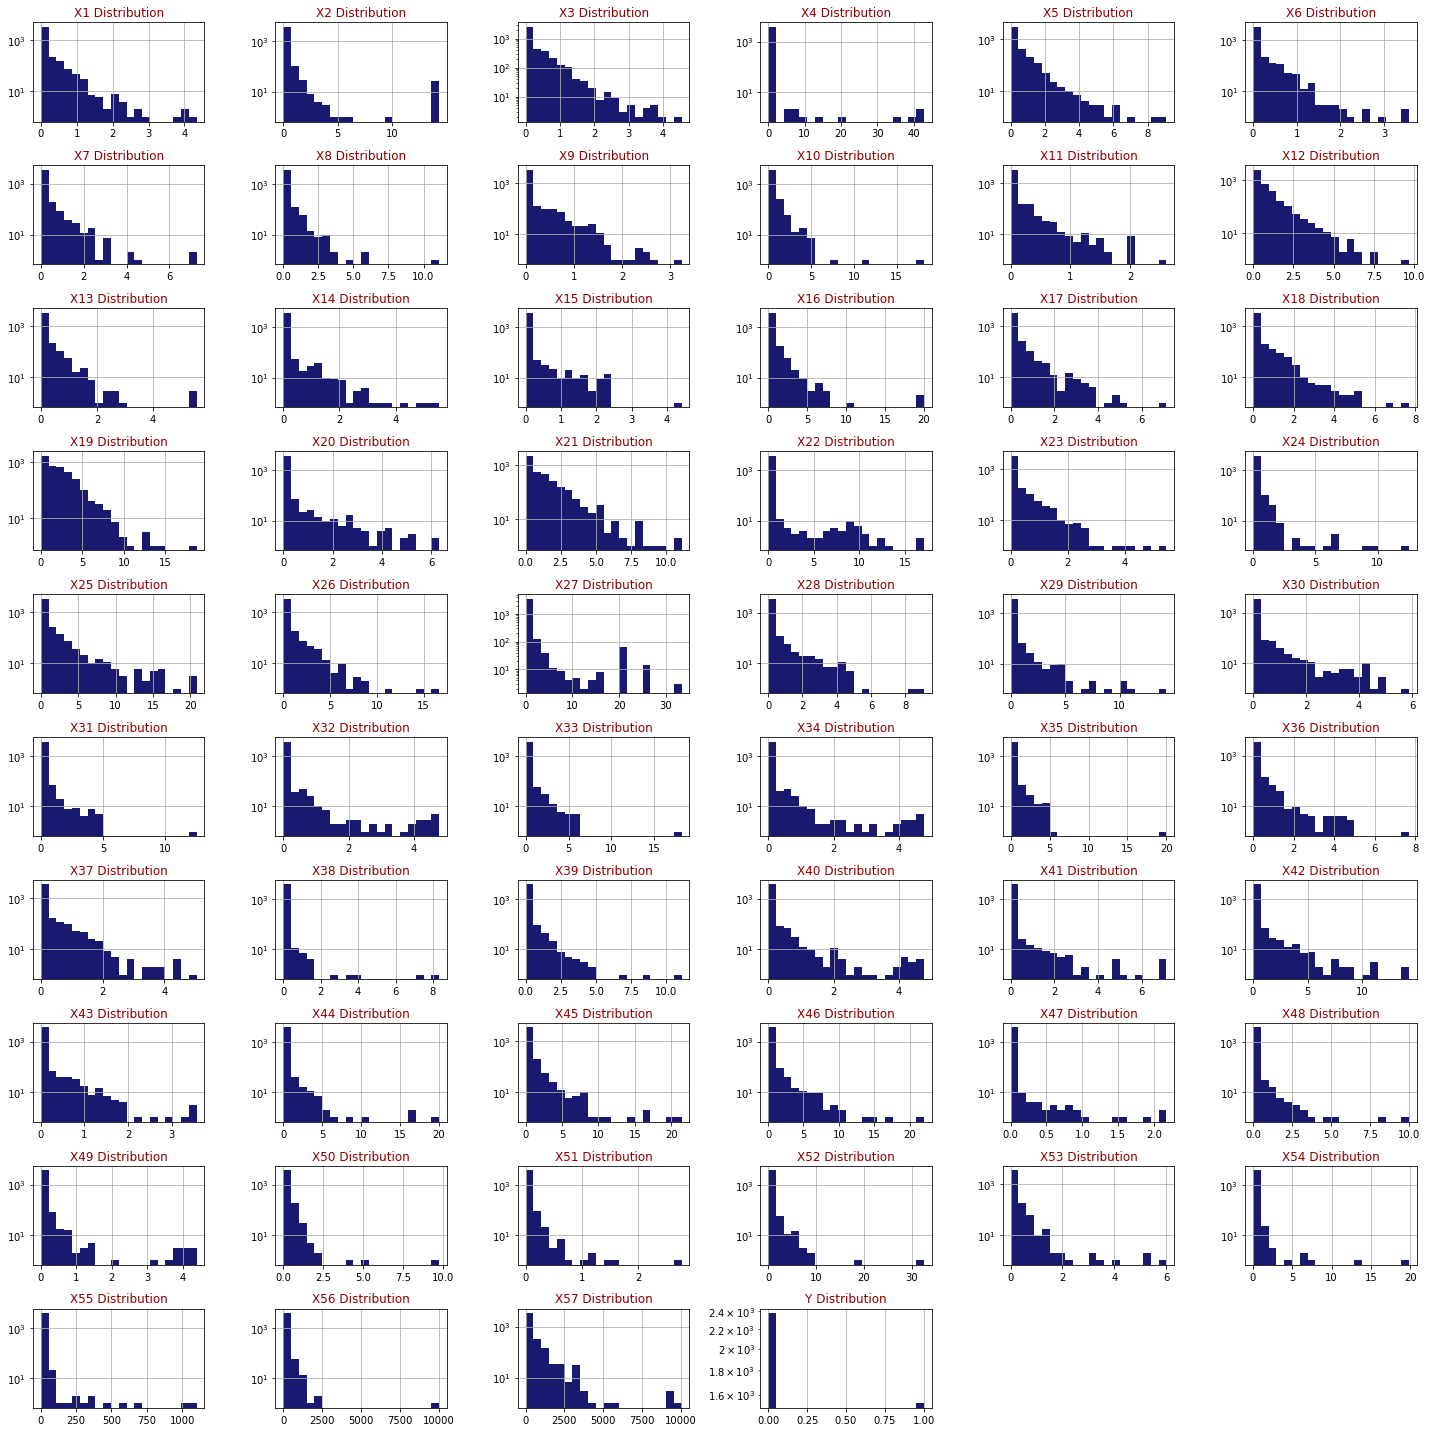

In [149]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,10,6)

Features like X4,X24,X38,X55,X56 has mostly zeroes . Iam tempted to drop especially X4 and X55 which looks poorly distributed.

### 1.C Correlation 

Lets drop features with high multicollinearity

In [150]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
X1,1.000000,-0.026677,0.078010,0.007472,0.025377,0.060360,0.004934,0.002262,0.128300,0.038547,...,-0.026043,-0.019084,-0.042516,0.049536,0.128384,-0.009324,0.032279,0.056025,0.101600,0.129805
X2,-0.026677,1.000000,-0.030758,-0.006455,-0.020289,-0.023827,0.006748,-0.014461,0.000199,0.035494,...,-0.006349,-0.045741,-0.021728,-0.014497,-0.008293,0.001034,0.004376,0.001448,-0.021016,-0.026476
X3,0.078010,-0.030758,1.000000,-0.018648,0.065148,0.093120,0.037979,0.018314,0.098008,0.029760,...,-0.031217,-0.019428,-0.039784,0.109943,0.084654,-0.007824,0.080559,0.091124,0.067387,0.204965
X4,0.007472,-0.006455,-0.018648,1.000000,0.001837,-0.008594,0.015680,0.004700,0.000138,-0.002183,...,0.001048,-0.009132,-0.008458,-0.002776,0.008798,-0.001704,0.004715,0.020733,0.021542,0.055609
X5,0.025377,-0.020289,0.065148,0.001837,1.000000,0.065459,0.157810,0.030440,0.023903,0.038379,...,-0.030872,-0.050698,-0.026512,0.025764,0.042036,0.004088,0.048949,0.045998,0.004402,0.242400
X6,0.060360,-0.023827,0.093120,-0.008594,0.065459,1.000000,0.074811,0.095892,0.132624,0.015163,...,-0.015690,-0.004675,-0.031567,0.065323,0.104906,0.020024,-0.010804,0.083647,0.086964,0.253613
X7,0.004934,0.006748,0.037979,0.015680,0.157810,0.074811,1.000000,0.047656,0.057607,0.048401,...,-0.035855,-0.049371,-0.035751,0.044416,0.060073,0.043426,0.040228,0.053253,-0.008160,0.327233
X8,0.002262,-0.014461,0.018314,0.004700,0.030440,0.095892,0.047656,1.000000,0.097821,0.085445,...,-0.028603,-0.032195,-0.023941,0.032774,0.052817,-0.009910,0.013975,0.037654,0.046959,0.217332
X9,0.128300,0.000199,0.098008,0.000138,0.023903,0.132624,0.057607,0.097821,1.000000,0.138875,...,-0.014399,-0.030304,0.028297,0.046721,0.160436,-0.003807,0.105594,0.181932,0.276767,0.254297
X10,0.038547,0.035494,0.029760,-0.002183,0.038379,0.015163,0.048401,0.085445,0.138875,1.000000,...,0.013110,0.001187,0.012993,0.038433,0.069121,0.048458,0.068394,0.097029,0.092385,0.138245


In [151]:


# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)
data.drop(to_drop, axis=1, inplace=True)

['X34']


/Users/pawankulkarni/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


### 1.D Duplicates check

In [152]:
datac=data.copy()
datac.drop_duplicates(subset=None, inplace=True)

In [153]:
datac.shape

(3614, 57)

In [154]:
data.shape

(3910, 57)

There were around 300 duplicates in dataset

In [155]:
data.drop_duplicates(subset=None, inplace=True)
del datac

### 1.E Class Imbalance

In [156]:
data['Y'].value_counts()

0    2176
1    1438
Name: Y, dtype: int64

Data is skewed towards '0' . We will keep this as it is now and use weighted Logistic regression to solve this issue.

### 1.F Data Normalization

Before diving into any model , we will normalize the data . Now all the models do not require normalisation but its is harmless to perform it . Also PCA highly requires normalisation since it plays on variance .

In [157]:
cols = data.columns[:-1]
X = data[cols]

In [158]:


# create a scaler object
scaler = MinMaxScaler()
scaler.fit_transform(X)
# fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



In [159]:
X_norm

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.000000,0.000000,0.955947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.041320,0.000000,0.000000,0.000182,0.000100,0.001093
1,0.000000,0.039216,0.123348,0.000000,0.123212,0.156863,0.309491,0.000000,0.000000,0.030803,...,0.0,0.0,0.008511,0.0,0.015487,0.000000,0.004186,0.013894,0.014718,0.037173
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000398
3,0.147465,0.000000,0.140969,0.000000,0.212321,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.014225,0.061636,0.000000,0.001307,0.002103,0.012027
4,0.133641,0.000000,0.000000,0.828311,0.063806,0.000000,0.079780,0.052205,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.007359,0.039813,0.000000,0.002123,0.012215,0.020475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000648,0.000300,0.001093
3610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000908,0.000200,0.000298
3611,0.027650,0.000000,0.026432,0.000000,0.000000,0.070028,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.009537,0.0,0.000708,0.000000,0.000000,0.000224,0.000400,0.012921
3612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280828,0.000000,0.000000,...,0.0,0.0,0.020304,0.0,0.006096,0.032984,0.000000,0.002594,0.002403,0.007951


In [160]:
Y = data["Y"]

performing normalization on X data

# 2.Model Building

### 2A. Logistic Regression 

So I will build 2 models , one each of tree based and regression based.
Logistic Regression and Random Forest.

Why Logistic Regression?

1. It is simple to comprehend
2. It trains quickly and because we have lots of features , we have to take production time cost into the account , we cannot just build complex ANNs just because it is more accurate.
3.We can adjust class weights as a parameter without having to use smoting or oversampling seperately for class imbalance.
4. We get prediction probabilites unlike some other algorithms , because of which we can set probability threshold to classify.
5. It doesnt overfits easily as it's a linear model.

Why Random Forest?

1. Personally I have got great results with Random Forest in past.
2. We can adjust class weights as a parameter without having to use smoting or oversampling seperately for class imbalance.
3. It trains with great accuracy ( I personally got very high accuracy with random forest in past and iam very biased to use it atleast once in every model training process)


Having said that , there is no one definite answer on model selection . Its all experimentation and tradeoff between time and accuracy based on whcih we have to choose a model.


## 2.A.1 Full Data

In [161]:
#Full Data

# Dividing data into 4:1 ratio i.e. 80%-20%
x_train,x_test,y_train,y_test=train_test_split(X_norm,Y,test_size=.2,stratify=Y,random_state=42)


start_time = time.time()
logreg=LogisticRegression(class_weight = {0:40, 1:60}) #There are 60% 0s and 40% 1s , so assigning class weigths accordingly
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_train_pred = logreg.predict(x_train)
print("Model took  %s seconds to train" % (time.time() - start_time))

print("TRAINING CLASSIFICATION REPORT")
print(" ")
print(classification_report(y_train,y_train_pred))
print(" ")
print("TESTING CLASSIFICATION REPORT")
print(" ")
print(classification_report(y_test,y_pred))

Model took  0.059909820556640625 seconds to train
TRAINING CLASSIFICATION REPORT
 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1741
           1       0.91      0.91      0.91      1150

    accuracy                           0.93      2891
   macro avg       0.93      0.93      0.93      2891
weighted avg       0.93      0.93      0.93      2891

 
TESTING CLASSIFICATION REPORT
 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       435
           1       0.92      0.89      0.90       288

    accuracy                           0.92       723
   macro avg       0.92      0.92      0.92       723
weighted avg       0.92      0.92      0.92       723



/Users/pawankulkarni/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model took 0.068 sec to train on 57 features and 3.6k rows

0.90 F1 score on minority class which is not bad at all . Also its not overfitting at all. 
Lets look at confusion matrix and roc curve see if we can improve its accuracy.

In [162]:

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[412  23]
 [ 33 255]]


So there are 56 incorrect classifications with 33 False negatives and 23 False Positives . 
As there are more false Negatives , we need to reduces classification threshold slightly to reduce missclasifications.

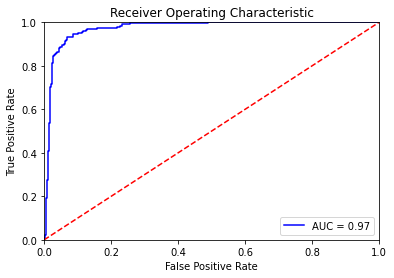

In [163]:

# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [164]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.3938008281593582


And ROC curve seems to agree with us.  Lets take few threshold values and calculate classification reports for those and select the best threshold in range of 0.39.

# 2.A.2 Threshold Optimization

In [165]:
threshs = [0.35,0.39,0.42,0.45]

for thresh in threshs:
    y_pred = (logreg.predict_proba(x_test)[:,1] >= thresh).astype(bool)
    
    print("%s threshold CLASSIFICATION REPORT"%(thresh))
    print(" ")
    print(classification_report(y_test,y_pred))
    
#y_pred = (logreg.predict_proba(x_test)[:,1] >= 0.45).astype(bool)

0.35 threshold CLASSIFICATION REPORT
 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       435
           1       0.87      0.95      0.91       288

    accuracy                           0.92       723
   macro avg       0.91      0.93      0.92       723
weighted avg       0.92      0.92      0.92       723

0.39 threshold CLASSIFICATION REPORT
 
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       435
           1       0.88      0.95      0.91       288

    accuracy                           0.93       723
   macro avg       0.92      0.93      0.93       723
weighted avg       0.93      0.93      0.93       723

0.42 threshold CLASSIFICATION REPORT
 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       435
           1       0.90      0.93      0.91       288

    accuracy                           0.93       723
   macro av

They all give around same F1 but at 0.45 , we get good balance of Precision and Recall for both 0 and 1.

## 2.A.3 Backward Feature elimination

This method is used to eliminate features by training models by eliminating features sequentially.

In [167]:
logistic = LogisticRegression()

sfs1 = sfs(logistic, k_features=30, forward=False, verbose=1) # Method for Backward feature elimination
# k_features here means how much features we have to keep at the end
# verbose =1 means we are saying model to display its training params
#forward = False meanse we have to perform backeard elimination

In [168]:
sfs1 = sfs1.fit(X_norm, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    4.3s finished
Features: 55/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    4.4s finished
Features: 54/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    4.5s finished
Features: 53/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    4.2s finished
Features: 52/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    4.1s finished
Features: 51/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    4.1s finished
Features: 50/30[Par

In [169]:
list(sfs1.k_feature_names_) # these were the features remaining at the end

['X3',
 'X5',
 'X7',
 'X8',
 'X9',
 'X11',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X29',
 'X30',
 'X33',
 'X37',
 'X39',
 'X42',
 'X45',
 'X46',
 'X49',
 'X52',
 'X53',
 'X57']

In [170]:
df = X_norm[list(sfs1.k_feature_names_)]

In [171]:
df

,X3,X5,X7,X8,X9,X11,X16,X17,X18,X19,...,X33,X37,X39,X42,X45,X46,X49,X52,X53,X57
0,0.955947,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.041320,0.000000,0.001093
1,0.123348,0.123212,0.309491,0.000000,0.000000,0.000000,0.0000,0.000000,0.072822,0.180267,...,0.000000,0.0,0.0,0.0,0.026144,0.000000,0.0,0.015487,0.000000,0.037173
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.432000,...,0.000000,0.0,0.0,0.0,0.126050,0.000000,0.0,0.000000,0.000000,0.000398
3,0.140969,0.212321,0.000000,0.000000,0.000000,0.000000,0.0645,0.089636,0.000000,0.102933,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.014225,0.061636,0.012027
4,0.000000,0.063806,0.079780,0.052205,0.000000,0.000000,0.0290,0.081232,0.075423,0.030933,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.007359,0.039813,0.020475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.389867,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001093
3610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000298
3611,0.026432,0.000000,0.000000,0.000000,0.000000,0.000000,0.0060,0.000000,0.000000,0.116800,...,0.000000,0.0,0.0,0.0,0.011671,0.005442,0.0,0.000708,0.000000,0.012921
3612,0.000000,0.000000,0.000000,0.280828,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.048553,0.000000,0.0,0.006096,0.032984,0.007951


In [172]:

x_train_r,x_test_r,y_train_r,y_test_r=train_test_split(df,Y,test_size=.2,stratify=Y,random_state=42)
start_time = time.time()
logreg=LogisticRegression(class_weight = {0:40, 1:60}) #There are 60% 0s and 40% 1s , so assigning class weigths accordingly
logreg.fit(x_train_r,y_train_r)
y_pred_r=logreg.predict(x_test_r)
y_train_pred = logreg.predict(x_train_r)
print("Model took  %s seconds to train" % (time.time() - start_time))

print(classification_report(y_test_r,y_pred_r))

Model took  0.06116509437561035 seconds to train
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       435
           1       0.93      0.90      0.91       288

    accuracy                           0.93       723
   macro avg       0.93      0.93      0.93       723
weighted avg       0.93      0.93      0.93       723



Awesome , model eliminated 25 features and it almost got same accuracy .
It also took 0.01 second less  .
It might not seem that much with such less data but with large dataset , this matters.

In [173]:


#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_r, y_pred_r)

print(cf_matrix)

[[416  19]
 [ 30 258]]


Only 49 incorrect classifications , It even performed marginally better.

In [174]:
y_pred = (logreg.predict_proba(x_test_r)[:,1] >= 0.45).astype(bool)

In [175]:

print(classification_report(y_test_r,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       435
           1       0.92      0.91      0.92       288

    accuracy                           0.93       723
   macro avg       0.93      0.93      0.93       723
weighted avg       0.93      0.93      0.93       723



In [176]:


#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_r, y_pred_r)

print(cf_matrix)

[[416  19]
 [ 30 258]]


## 2.A.4 Feature Importance According to Logistic Regression

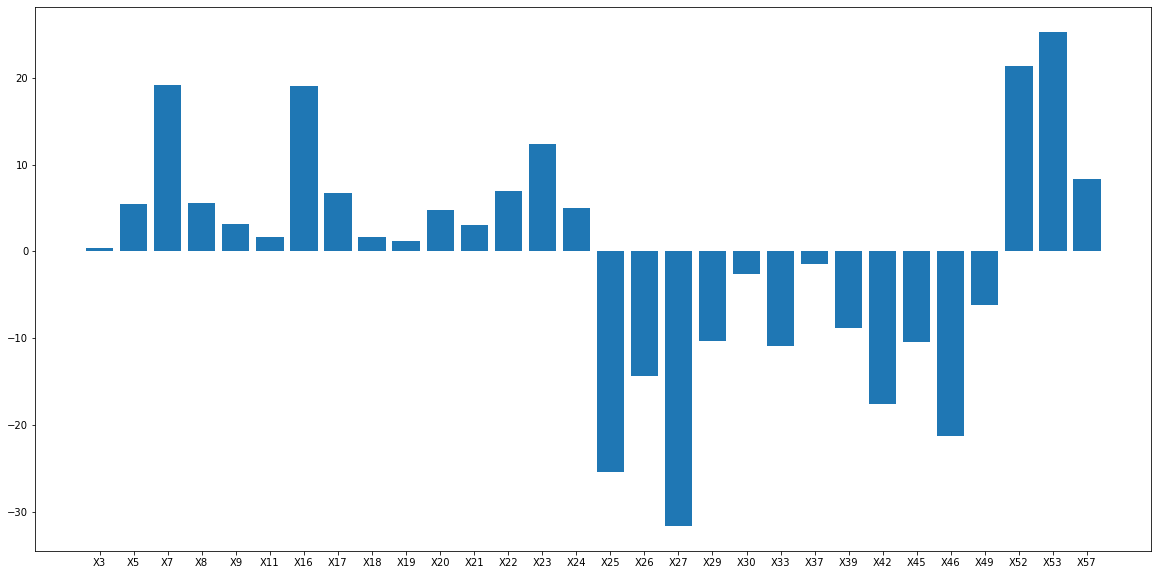

In [177]:
from matplotlib import pyplot
importance = logreg.coef_[0]
# summarize feature importance
# plot feature importance
fig=pyplot.figure(figsize=(20,10))
pyplot.bar(x_train_r.columns, importance)
pyplot.show()

After adjusting for threshold , we even got better results marginally .

# 2.B RANDOM FOREST

 ## 2.B.1 Full Dataset

In [178]:

clf = RandomForestClassifier(max_features='sqrt',max_depth=30,criterion='entropy',min_samples_leaf=4,  n_estimators=300,class_weight={0:40, 1:60})
# max features is how much features we need to select Randomly for weak learner , in this case its sq root of 37 which is roughly 8
# max depth is depth of tree , More the depth , more it overfits
# criterion is tree splitting criteria
# n_estimator is no of weak learners we need to train
#min_samples_split represents the minimum number of samples required to split an internal node. 
start_time = time.time()
clf.fit(x_train,y_train)
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test) 
print("Model took  %s seconds to train" % (time.time() - start_time))
print("TRAINING CLASSIFICATION REPORT")
print(" ")
print(classification_report(y_train,train_pred))
print(" ")
print("TESTING CLASSIFICATION REPORT")
print(" ")
print(classification_report(y_test,test_pred))

Model took  1.0202000141143799 seconds to train
TRAINING CLASSIFICATION REPORT
 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1741
           1       0.98      0.97      0.97      1150

    accuracy                           0.98      2891
   macro avg       0.98      0.98      0.98      2891
weighted avg       0.98      0.98      0.98      2891

 
TESTING CLASSIFICATION REPORT
 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       435
           1       0.95      0.92      0.93       288

    accuracy                           0.95       723
   macro avg       0.95      0.94      0.95       723
weighted avg       0.95      0.95      0.95       723



Model gave much higher accuracy values than Logistic regression BUT.......

It took more time to train (roughly 10x more) than logistic regression

In [179]:
x_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
797,0.000000,0.000000,0.085903,0.0,0.128713,0.0,0.000000,0.00000,0.000000,0.042904,...,0.0,0.000000,0.006358,0.000000,0.026757,0.030985,0.000000,0.002724,0.007709,0.025345
2295,0.036866,0.011204,0.110132,0.0,0.036304,0.0,0.000000,0.00000,0.154799,0.046205,...,0.0,0.000000,0.014664,0.000000,0.014102,0.023821,0.001412,0.004810,0.024630,0.077527
3291,0.000000,0.000000,0.231278,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.038540,0.000000,0.244508,0.000000,0.000000,0.000000,0.000995,0.001101,0.006361
799,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002167,0.001402,0.010337
1121,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.140814,...,0.0,0.000000,0.019893,0.069860,0.000000,0.000000,0.000000,0.002389,0.001602,0.006759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.000000,0.000000,0.000000,0.0,0.082508,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.022765,0.000000,0.000000,0.000000,0.000000,0.000756,0.001101,0.007554
2169,0.034562,0.021709,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.034653,...,0.0,0.033979,0.020406,0.017645,0.005357,0.000000,0.000000,0.002747,0.009912,0.060332
2498,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.305365,0.19982,0.000000,0.000000,...,0.0,0.000000,0.068191,0.000000,0.000000,0.110778,0.000000,0.003242,0.002403,0.006262
1480,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.013433,0.000000,0.008067,0.000000,0.000000,0.000567,0.000601,0.006361


### 2.B.2 Random Forest with Reduced features

In [180]:

start_time = time.time()
clf = RandomForestClassifier(max_features='sqrt',max_depth=30,criterion='entropy',min_samples_leaf=4,  n_estimators=300,class_weight={0:40, 1:60})
clf.fit(x_train_r,y_train_r)
y_pred_r=clf.predict(x_test_r)
print("Model took  %s seconds to train" % (time.time() - start_time))

print(classification_report(y_test_r,y_pred_r))

Model took  0.8071279525756836 seconds to train
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       435
           1       0.97      0.91      0.94       288

    accuracy                           0.95       723
   macro avg       0.96      0.94      0.95       723
weighted avg       0.95      0.95      0.95       723



So with reduced features , we have got much better accuracy with lesser  time too.

## 2.B.3 Feature Importance according to Random Forest

<AxesSubplot:>

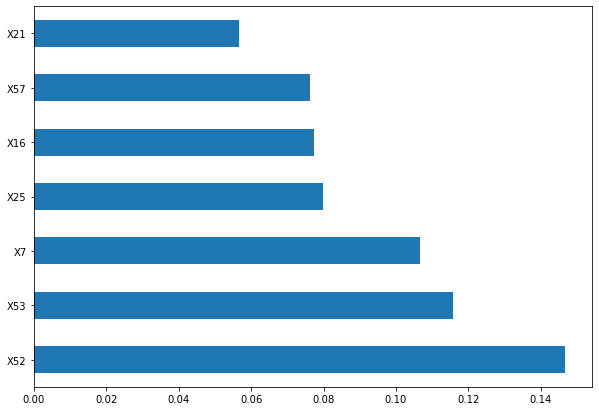

In [181]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(clf.feature_importances_, index = x_train_r.columns)
feat_importances.nlargest(7).plot(kind='barh')

# 3.Test Data

Finally Making Predictions On Test set

In [190]:
test = pd.read_csv("test_set.csv")

In [183]:
test_norm = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

In [184]:
reduced_test_norm = test_norm[x_train_r.columns] #Only Picking up those features that were used for training

In [185]:
test_pred_r = clf.predict(reduced_test_norm) #Picking Up Random Forest as my prediction model

In [186]:
len(test_pred_r)

691

In [187]:
test['Y'] = test_pred_r

In [188]:
test.to_csv("test_predictions.csv")

# 4. Conclusions

1. Many of the Features had many zero values
2. There were 300 duplicates 
3. We Dropped data with high multicollinearity 
4. Logistic regression with adjusted threshold and feature elimination actually improved our accuracy
5. Model didnt overfit , so no need to do Cross Validation and Regularization
6. Logistic regression took way less time than Random Forest
7. On the other hand Random forest gave us better accuracy
8. At the end of the day , we need to experiment more to get even more accuracy